In [ ]:
# looking for the center pixel to generate masks.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pydicom
import os
import json

In [2]:
jsonPath = "../../Env_3_7/data/squares/export_14-8.json"


data = []
with open(jsonPath, 'r') as file:
    lineNumber = 0
    for line in file:
        if 5699 >= lineNumber >= 5495:
            data.append(json.loads(line))
        lineNumber += 1
        
        if lineNumber > 5701:
            break

In [3]:
i = 0
record = None

for square in data:
    if square['Phase'] == "Arterial":
        print(i, square['Area'])
        
        if i == 25:
            record = square
        
        i+=1

0 {'y': 204, 'width': 130, 'x': 300}
1 {'y': 204, 'width': 130, 'x': 294}
2 {'y': 205, 'width': 130, 'x': 298}
3 {'y': 203, 'width': 130, 'x': 286}
4 {'y': 209, 'width': 130, 'x': 296}
5 {'y': 208, 'width': 130, 'x': 296}
6 {'y': 215, 'width': 130, 'x': 292}
7 {'y': 212, 'width': 130, 'x': 289}
8 {'y': 216, 'width': 130, 'x': 290}
9 {'y': 213, 'width': 130, 'x': 289}
10 {'y': 217, 'width': 130, 'x': 289}
11 {'y': 215, 'width': 130, 'x': 285}
12 {'y': 219, 'width': 130, 'x': 294}
13 {'y': 221, 'width': 130, 'x': 288}
14 {'y': 224, 'width': 130, 'x': 289}
15 {'y': 221, 'width': 130, 'x': 286}
16 {'y': 224, 'width': 130, 'x': 288}
17 {'y': 221, 'width': 130, 'x': 278}
18 {'y': 229, 'width': 130, 'x': 277}
19 {'y': 228, 'width': 130, 'x': 280}
20 {'y': 232, 'width': 130, 'x': 280}
21 {'y': 232, 'width': 130, 'x': 276}
22 {'y': 236, 'width': 130, 'x': 280}
23 {'y': 227, 'width': 130, 'x': 276}
24 {'y': 237, 'width': 130, 'x': 285}
25 {'y': 235, 'width': 130, 'x': 276}
26 {'y': 239, 'width':

In [4]:
#25 {'y': 235, 'width': 130, 'x': 276}
# so 300, 341 is in the "middle"

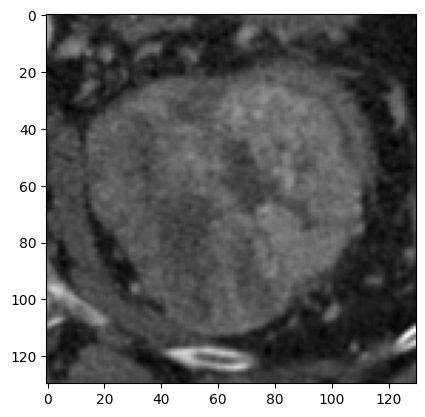

In [5]:
imageFromSquare = np.asarray(record['Image']).reshape((130,130))
plt.imshow(imageFromSquare, cmap=plt.cm.gray)
plt.show()

In [6]:
imagePath = "../data/malignant/OK TEST 2017-03-08 461208 NL 80mm [ccRCC]/T25.dcm"
file = pydicom.dcmread(imagePath)

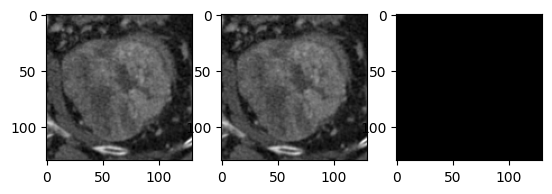

In [7]:
fig, ax = plt.subplots(1, 3)
x = record['Area']['x']
y = record['Area']['y']

ax[0].imshow(file.pixel_array[y:y+130, x:x+130], cmap=plt.cm.gray)
ax[1].imshow(imageFromSquare, cmap=plt.cm.gray)
ax[2].imshow(file.pixel_array[y:y+130, x:x+130] - imageFromSquare, cmap=plt.cm.gray)
plt.show()